### Exploratory Data Analysis

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [149]:
dataset=pd.read_csv(r'C:\Users\anuj8\ML Models in python\ML pipeline data\train.csv')

In [150]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [151]:
#In Data Analysis We will Analyze To Find out the below stuff
#Missing Values
#All The Numerical Variables
#Distribution of the Numerical Variables--> done to check whether the data is skewed or not.
## if skewed we must apply some transformation, to make it normal.Very important to do this for regression
#Categorical Variables
#Cardinality(no of levels) of Categorical Variables
#Outliers
#Relationship between independent and dependent feature(SalePrice)

In [152]:
columns = [dataset.columns]

In [153]:
lis = [features for features in dataset.columns if dataset[features].isnull().sum()>0]

In [154]:
lis

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

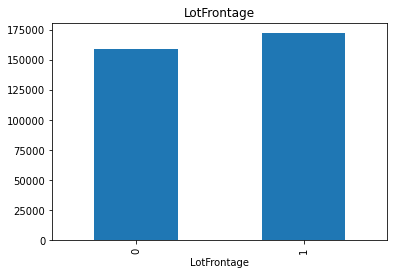

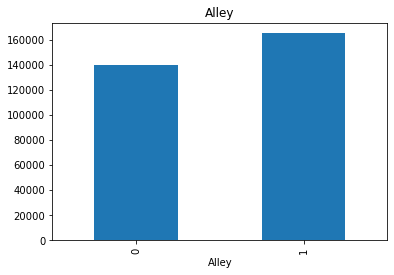

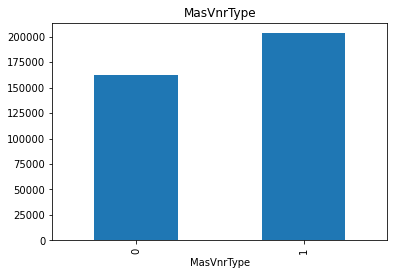

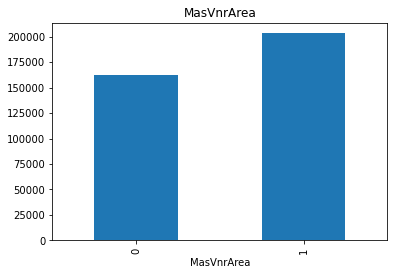

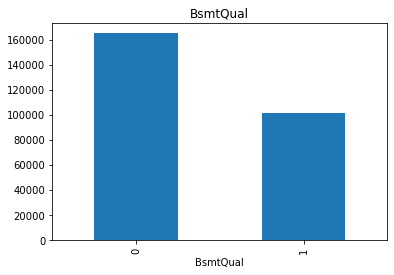

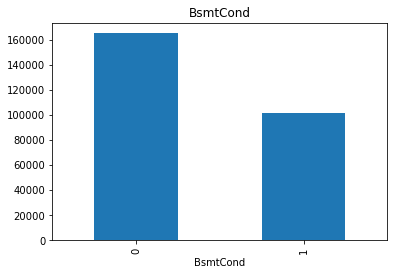

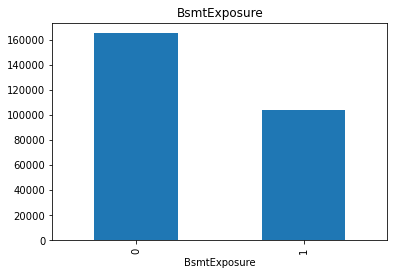

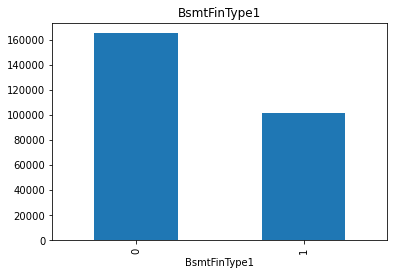

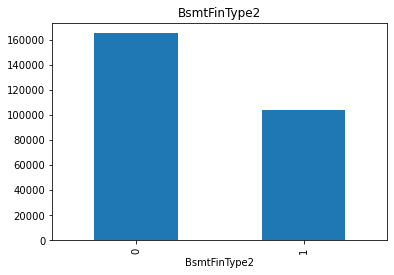

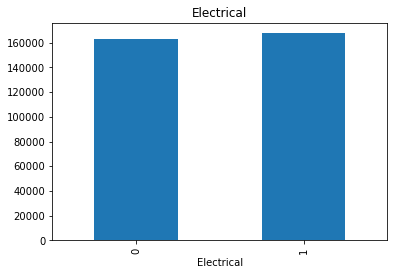

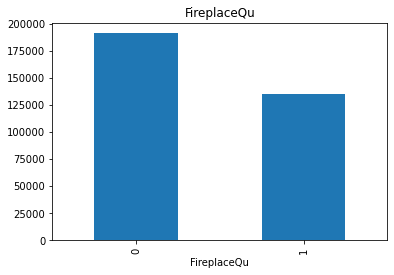

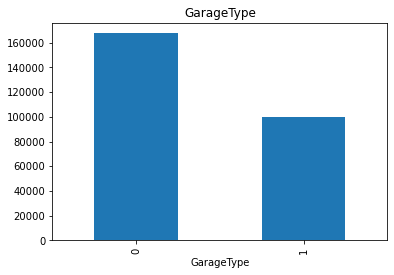

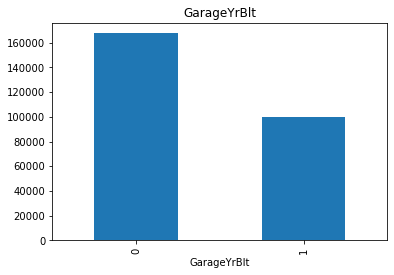

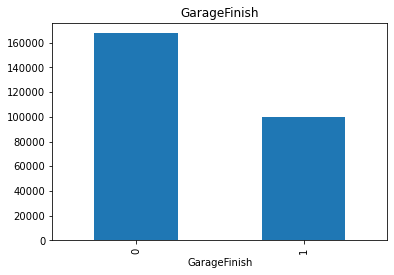

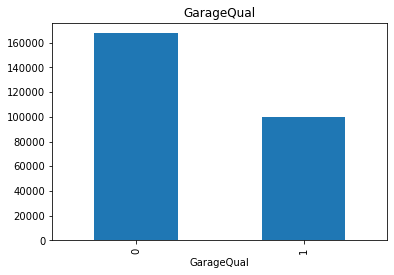

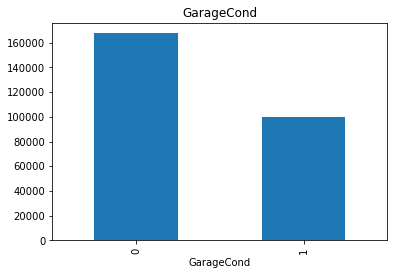

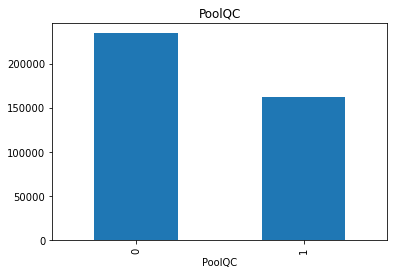

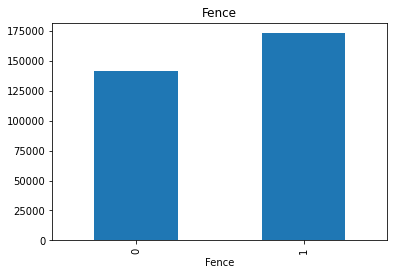

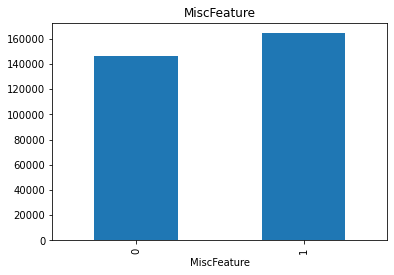

In [157]:
# the for loop basically makes all blank entries as 1 and non blank as 0 and plots the median prices of both categories.
# this is done to check relationship between blank values of a particular variable with the target variable 
for header in lis:
    data = dataset.copy() # if we do data = dataset, then both the variables will be pointing to the same memory space.
    data[header] = np.where(data[header].isnull(),1,0)
    data.groupby(by = header)['SalePrice'].median().plot.bar()
    plt.title(header)
    plt.show()

In [158]:
type(data.groupby('LotFrontage')['SalePrice'].median())

pandas.core.series.Series

In [159]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   
32      33          20       RL         85.0    11049   Pave   NaN      Reg   
33      34          20       RL         70.0    10552   Pave   NaN      IR1   
34      35         120       RL         60.0     7313   Pave   NaN      Reg   
35      36          60       RL        108.0    13418   Pave   NaN      Reg   
36      37          20       RL        112.0    10859   Pave   NaN      Reg   
37      38          20       RL         74.0     8532   Pave   NaN      Reg   
38      39          20       RL         68.0     7922   Pave   NaN      Reg   
39      40          90       RL         65.0     6040   Pave   NaN      Reg   
40      41          20       RL         84.0     8658   Pave   NaN      Reg   
41      42          20       RL        115.0    16905   Pave   NaN      Reg   
42      43          85       RL          NaN     9180   Pave   NaN      IR1   
43      44          20       RL          NaN     9200   Pave   NaN      IR1   
44      45          20       RL         70.0     7945   Pave   NaN      Reg   
45      46         120       RL         61.0     7658   Pave   NaN      Reg   
46      47          50       RL         48.0    12822   Pave   NaN      IR1   
47      48          20       FV         84.0    11096   Pave   NaN      Reg   
48      49         190       RM         33.0     4456   Pave   NaN      Reg   
49      50          20       RL         66.0     7742   Pa

In [164]:
# now id is a useless feature, so we will remove that.
del data['Id']

In [166]:
#Ndumerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']
#is = [features for features in dataset.columns if dataset[features].isnull().sum()>0]
#Lets find out the number of numerical variables
numerical = [feature for feature in data.columns if data[feature].dtypes != 'O']

In [168]:
len(numerical) # in all there are 38 numerical variables 

38

In [162]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [171]:
x = data[numerical]

In [172]:
# code to get to know the temporal variables
temporal = [feature for feature in x.columns if 'Year' in feature or 'Yr' in feature]

In [175]:
temporal # All the data time variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [182]:
x.groupby(by = 'YrSold')['SalePrice'].median()

YrSold
2006    163995
2007    167000
2008    164000
2009    162000
2010    155000
Name: SalePrice, dtype: int64

Text(0.5, 0, 'Years')

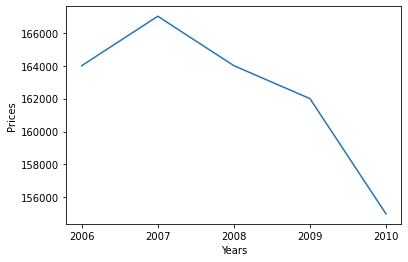

In [183]:
# lets analyze relationship between yrsold and SalePrice
ticks = [2006,2007,2008,2009,2010]
a = x.groupby(by = 'YrSold')['SalePrice'].median()
a.plot()
plt.ylabel('Prices')
plt.xticks(ticks)
plt.xlabel('Years')

In [210]:
x[temporal]

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0             5             5          5.0    2008
1            31            31         31.0    2007
2             7             6          7.0    2008
3            91            36          8.0    2006
4             8             8          8.0    2008
5            16            14         16.0    2009
6             3             2          3.0    2007
7            36            36         36.0    2009
8            77            58         77.0    2008
9            69            58         69.0    2008
10           43            43         43.0    2008
11            1             0          1.0    2006
12           46            46         46.0    2008
13            1             0          1.0    2007
14           48            48         48.0    2008
15           78             6         16.0    2007
16           40            40         40.0    2010
17           39            39         39.0    2006
18            4             4          4.0    2008
19           51            44         51.0    2009
20            1             0          1.0    2006
21           77            57         77.0    2007
22            6             6          6.0    2008
23           31            31         31.0    2007
24           42             9         42.0    2010
25            2             2          2.0    2009
26           59            10          5.0    2010
27            3             2          2.0    2010
28           49             9         49.0    2006
29           81            58         88.0    2008
30           88            58         88.0    2008
31           42             2         42.0    2008
32            1             1          1.0    2008
33           51            51         51.0    2010
34            2             2          2.0    2007
35            2             1          2.0    2006
36           15            14         14.0    2009
37           55            19         55.0    2009
38           57             3         57.0    2010
39           53            53          NaN    2008
40           41            41         41.0    2006
41           48            48         48.0    2007
42           24            24         24.0    2007
43           33            28         31.0    2008
44           47            47         47.0    2006
45            5             5          5.0    2010
46            6             6          6.0    2009
47            1             1          1.0    2007
48           89             1          NaN    2009
49           41            41         41.0    2007
50           10            10         10.0    2007
51           72            56         21.0    2006
52           47            47         47.0    2010
53           25            19         25.0    2006
54           52            52         45.0    2007
55           44            44         44.0    2008
56           10             9         10.0    2009
57            2             2          2.0    2006
58            0             0          0.0    2006
59           36            36         35.0    2008
60            2             2          0.0    2006
61           87            11         72.0    2007
62            1             1          1.0    2007
63           89            60         20.0    2010
64           12            11         11.0    2009
65            3             2          3.0    2007
66           40            21         40.0    2010
67            4             4          4.0    2007
68           65            60         65.0    2010
69           53            53         53.0    2006
70           34            34         34.0    2007
71           25             1         20.0    2007
72           11            11         11.0    2009
73           56             7         21.0    2010
74           95            60         95.0    2010
75           36            36         36.0    2009
76           52            52         52.0    2008
77           60             

C:\Users\anuj8\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


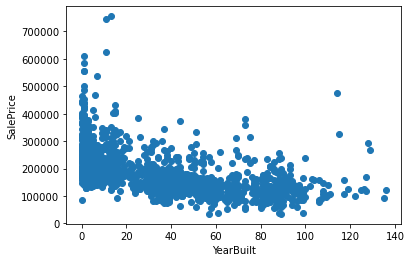

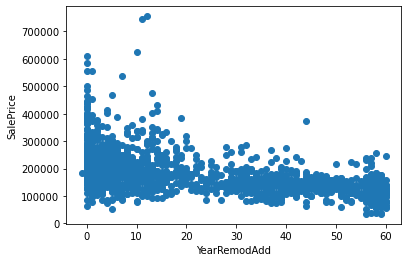

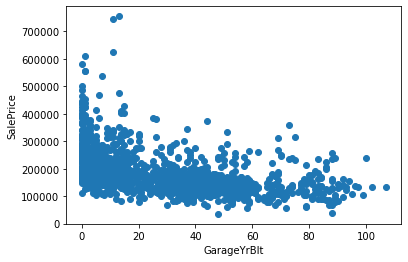

In [218]:
# now lets analyze relation between the diference (YearSold - (other temporal variable) and Sale price)
# ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
for feature in temporal:
    if feature != 'YrSold':
        data = x
        data[feature] = data['YrSold'] - data[feature]
        #print(data[feature])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel('Difference btweeen year sold and'+feature)
        plt.ylabel('SalePrice')
        plt.show() # to build plots iteratively, its a must line of code.
        

In [215]:
x[['YearRemodAdd','YrSold']]

YearRemodAdd  YrSold
0             2003    2008
1             1976    2007
2             2002    2008
3             1970    2006
4             2000    2008
5             1995    2009
6             2005    2007
7             1973    2009
8             1950    2008
9             1950    2008
10            1965    2008
11            2006    2006
12            1962    2008
13            2007    2007
14            1960    2008
15            2001    2007
16            1970    2010
17            1967    2006
18            2004    2008
19            1965    2009
20            2006    2006
21            1950    2007
22            2002    2008
23            1976    2007
24            2001    2010
25            2007    2009
26            2000    2010
27            2008    2010
28            1997    2006
29            1950    2008
30            1950    2008
31            2006    2008
32            2007    2008
33            1959    2010
34            2005    2007
35            2005    2006
36            1995    2009
37            1990    2009
38            2007    2010
39            1955    2008
40            1965    2006
41            1959    2007
42            1983    2007
43            1980    2008
44            1959    2006
45            2005    2010
46            2003    2009
47            2006    2007
48            2008    2009
49            1966    2007
50            1997    2007
51            1950    2006
52            1963    2010
53            1987    2006
54            1955    2007
55            1964    2008
56            2000    2009
57            2004    2006
58            2006    2006
59            1972    2008
60            2004    2006
61            1996    2007
62            2006    2007
63            1950    2010
64            1998    2009
65            2005    2007
66            1989    2010
67            2003    2007
68            1950    2010
69            1953    2006
70            1973    2007
71            2006    2007
72            1998    2009
73            2003    2010
74            1950    2010
75            1973    2009
76            1956    2008
77            2001    2008
78            1968    2010
79            1981    2009
80            1968    2009
81            1998    2006
82            2007    2008
83            1960    2007
84            1996    2009
85            1992    2006
86            2005    2009
87            2009    2009
88            1982    2009
89            1995    2007
90            1950    2006
91            1961    2006
92            2006    2009
93            1998    2007
94            1997    2007
95            1993    2009
96            1999    2006
97            1965    2007
98            1950    2010
99            1959    2010
100           2001    2010
101           1985    2010
102           1979    2009
103           2009    2010
104           1950    2007
105           2004    2008
106           1995    2007
107           1950    2008
108           2005    2007
109           1977    2010
110           1972    2006
111           2000    2010
112           2007    2007
113           1953    2007
114           2002    2007
115           1999    2007
116           1962    2009
117           2007    2007
118           1990    2010
119           2006    2006
120           1969    2006
121           1950    2007
122           1958    2008
123           1993    2008
124           1998    2009
125           1982    2006
126           1976    2007
127           1950    2007
128           1966    2006
129           1991    2006
130           1966    2006
131           2000    2009
132           2002    2007
133           2002    2009
134           1993    2006
135           1970    2008
136           1967    2007
137           1989    2006
138           2000    2008
139           1997    2009
140           1971    2010
141           2005    2006
142           1952    2010
143           1999    2009
144           1963    2006
145           2006    2006
146           1993    2009
147       

In [193]:
x.shape

(1460, 38)

In [202]:
x['LotArea']

0         8450
1         9600
2        11250
3         9550
4        14260
5        14115
6        10084
7        10382
8         6120
9         7420
10       11200
11       11924
12       12968
13       10652
14       10920
15        6120
16       11241
17       10791
18       13695
19        7560
20       14215
21        7449
22        9742
23        4224
24        8246
25       14230
26        7200
27       11478
28       16321
29        6324
30        8500
31        8544
32       11049
33       10552
34        7313
35       13418
36       10859
37        8532
38        7922
39        6040
40        8658
41       16905
42        9180
43        9200
44        7945
45        7658
46       12822
47       11096
48        4456
49        7742
50       13869
51        6240
52        8472
53       50271
54        7134
55       10175
56        2645
57       11645
58       13682
59        7200
60       13072
61        7200
62        6442
63       10300
64        9375
65        9591
66       1

In [201]:
for feature in x:
    print(feature)
    print(len(x[feature].unique()))

MSSubClass
15
LotFrontage
111
LotArea
1073
OverallQual
10
OverallCond
9
YearBuilt
122
YearRemodAdd
62
MasVnrArea
328
BsmtFinSF1
637
BsmtFinSF2
144
BsmtUnfSF
780
TotalBsmtSF
721
1stFlrSF
753
2ndFlrSF
417
LowQualFinSF
24
GrLivArea
861
BsmtFullBath
4
BsmtHalfBath
3
FullBath
4
HalfBath
3
BedroomAbvGr
8
KitchenAbvGr
4
TotRmsAbvGrd
12
Fireplaces
4
GarageYrBlt
102
GarageCars
5
GarageArea
441
WoodDeckSF
274
OpenPorchSF
202
EnclosedPorch
120
3SsnPorch
20
ScreenPorch
76
PoolArea
8
MiscFeature
2
MiscVal
21
MoSold
12
YrSold
5
SalePrice
663


In [221]:
# Next step is to determine discrete and continuous variables
# Discrete variables are the one which we can count
# Continuous variables are the ones which we can measure.
discrete = [feature for feature in x.columns if (len(x[feature].unique()) < 25)]

In [222]:
discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'YrSold']

In [223]:
x[discrete]

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscFeature  MiscVal  MoSold  \
0           0           2          0         0            1        0       2   
1           1           2          0         0            1        0       5   
2           1           2          0         0            1        0       9   
3           1           3          0         0            1        0       2   
4           1           3          0         0            1        0      12   

   YrSold  
0    2008  
1    2007  
2    2008  
3    2006  
4    2008

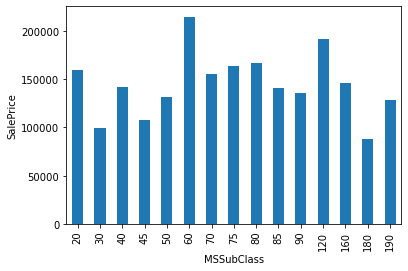

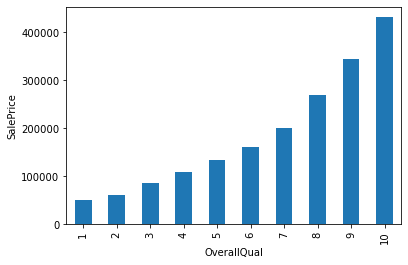

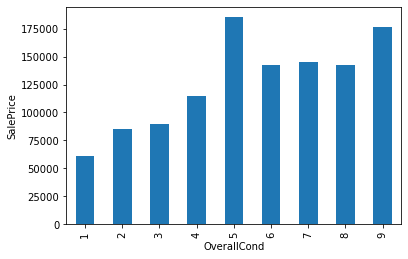

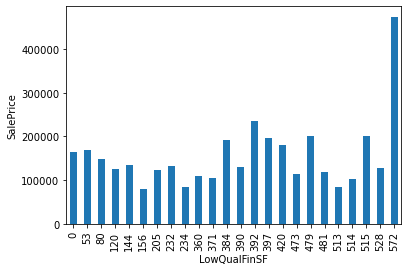

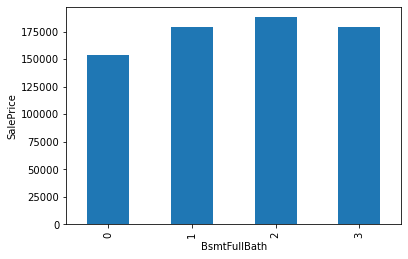

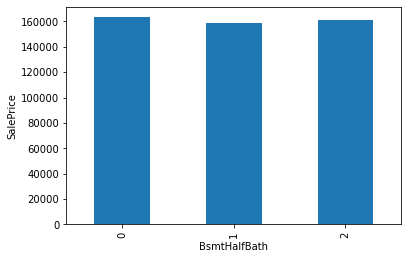

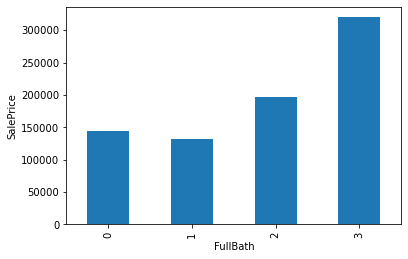

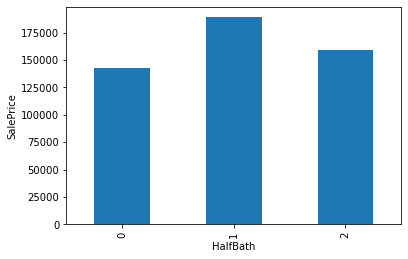

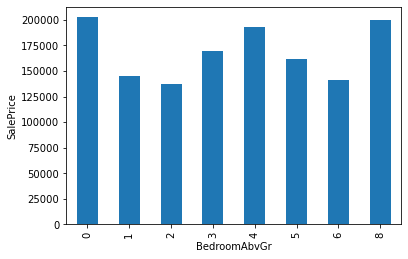

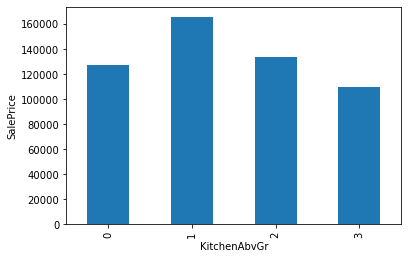

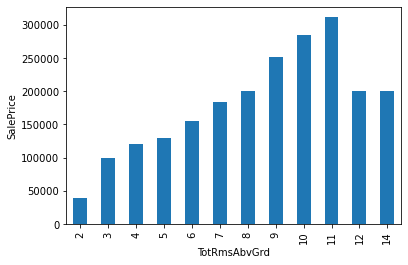

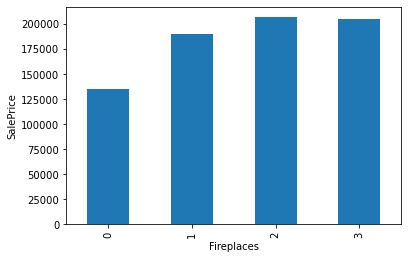

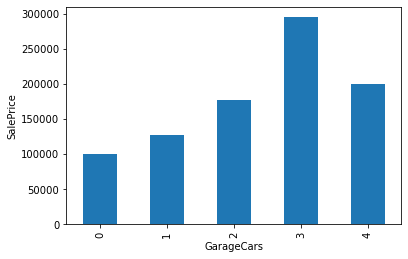

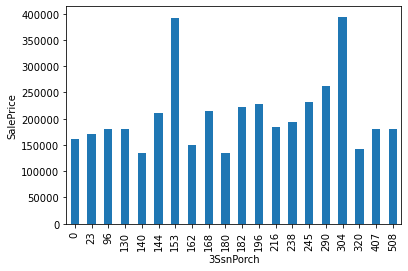

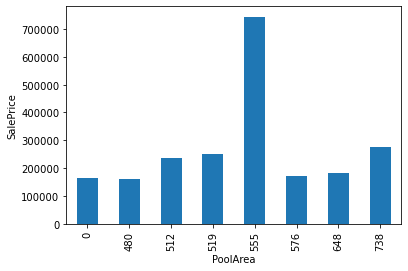

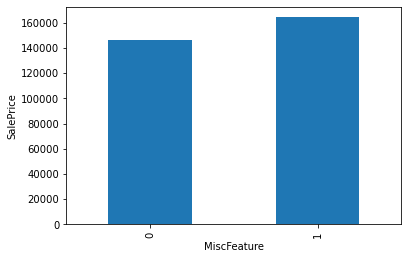

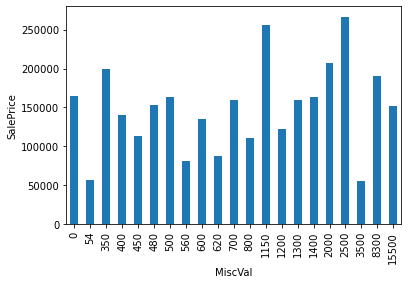

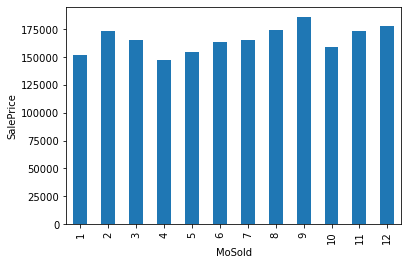

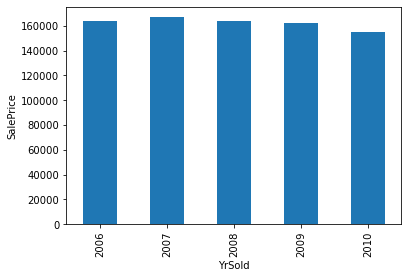

In [230]:
# In exploratory data analysis, we have to always gather some information. Always plot the features with the target variable.
for feature in discrete:
    x.groupby(by = feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# We can see an exponential rise when it comes to rleation between overall quality and SalePrice. This is also called as 
# having monotonic relation

In [232]:
# trying to find some information from continuous variables now.
continuous = [feature for feature in x.columns if (len(x[feature].unique()) >= 25)]

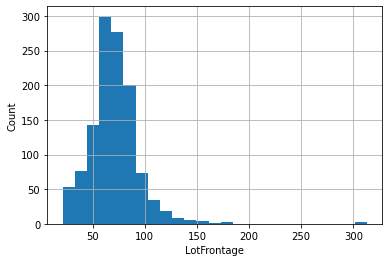

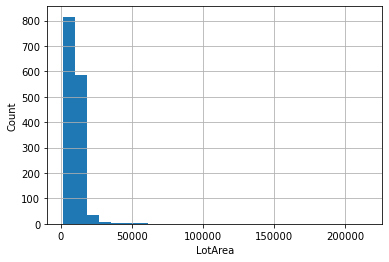

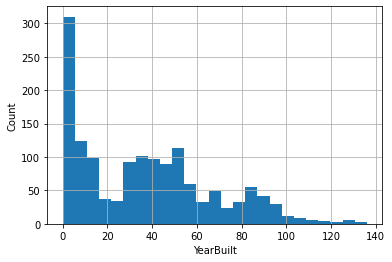

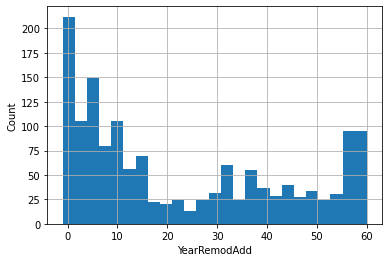

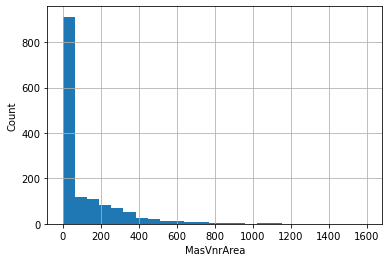

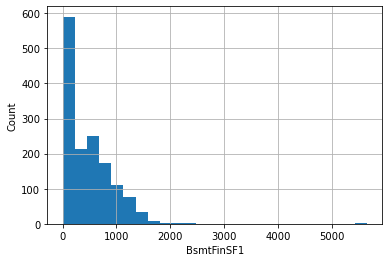

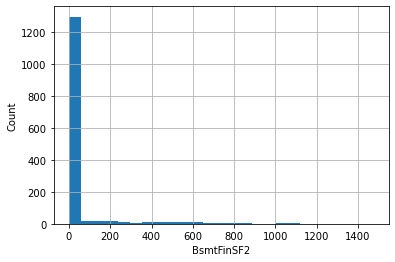

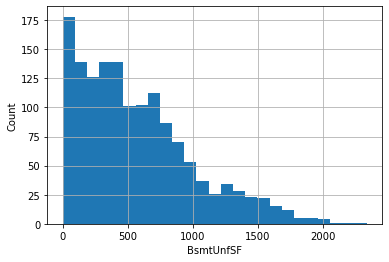

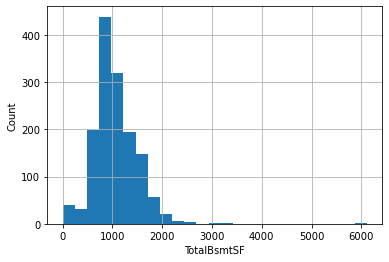

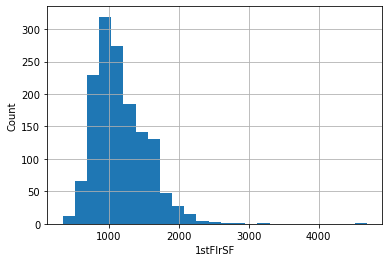

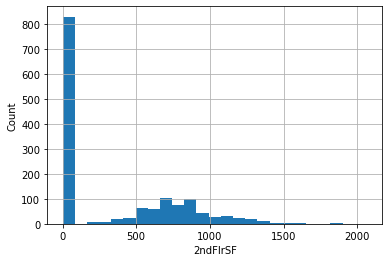

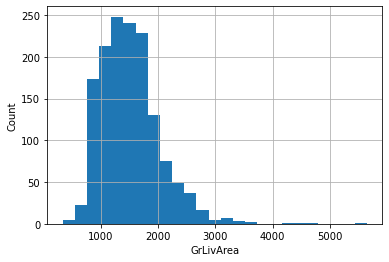

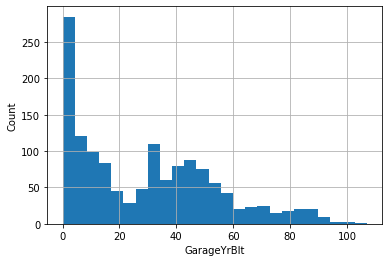

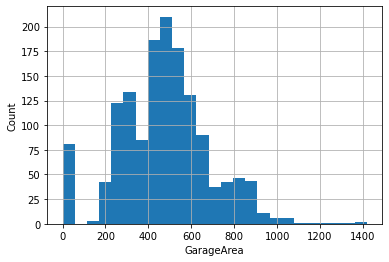

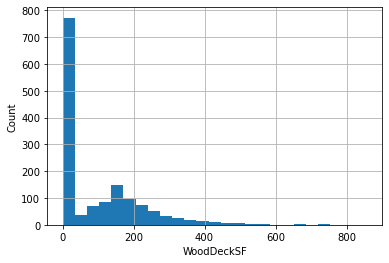

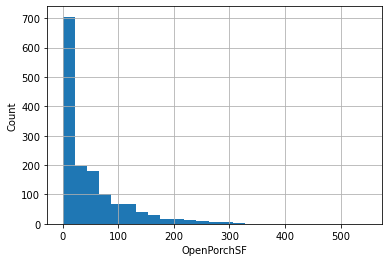

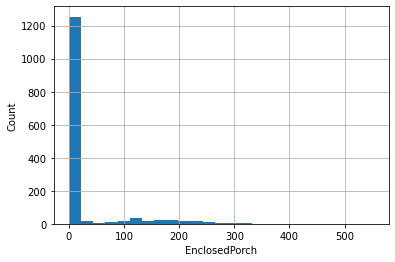

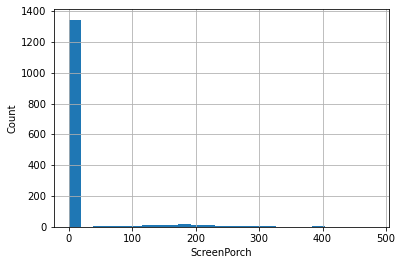

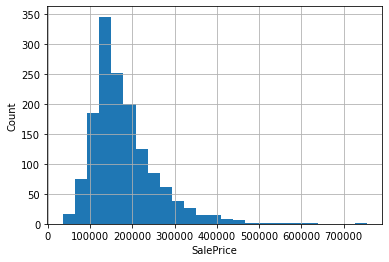

In [236]:
for feature in continuous:
    plt.grid()
    plt.hist(x[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    

In [238]:
# while some of the features have Gaussian(Normal Distribution)
# From this we reach to a consensus that, the data is skewed

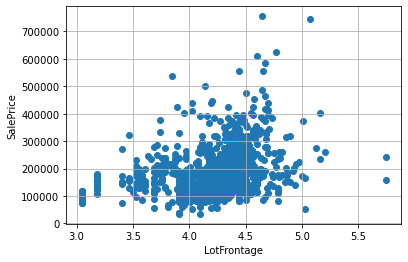

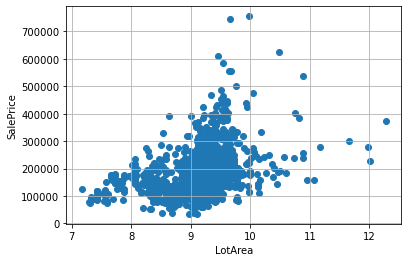

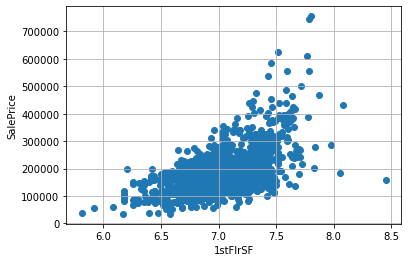

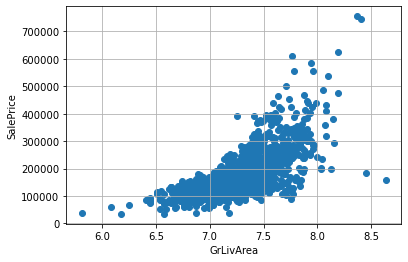

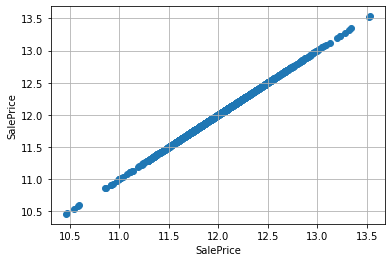

In [242]:
# To convert skewed variables into normal we will be using logarithmic transformation
for feature in continuous:
    data = x.copy()
    if 0 in data[feature].unique():
        pass  # means dont do anaything since log(0) is undefined
    else:
        data[feature] = np.log(data[feature])  #np.log() is log to the base e
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.grid()
        plt.show()

In [ ]:
# with the log transforation

In [248]:
a = x['1stFlrSF']

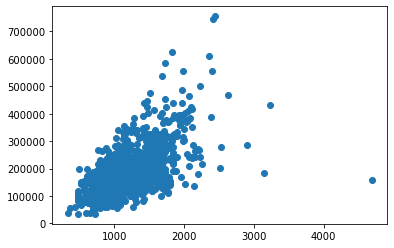

In [249]:
plt.scatter(a,x['SalePrice'])

In [ ]:
# thus with log transformation, we were able to achieve monotonic relation.

In [250]:
# now we will check if any outliers are present in the data or not.

C:\Users\anuj8\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\anuj8\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\anuj8\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\anuj8\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\anuj8\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


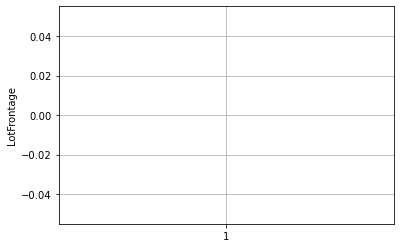

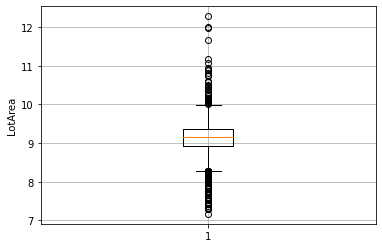

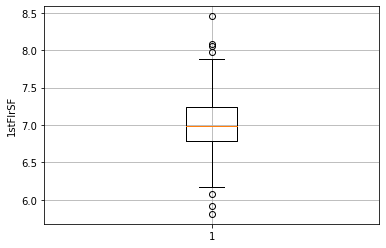

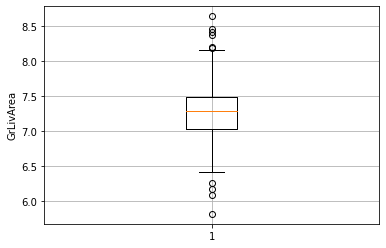

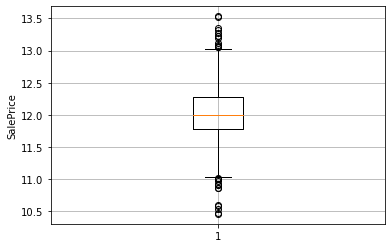

In [311]:
# Visulaizing outliers  (box plot - dots outside the box)  (histogram - isolated bins)
for feature in continuous:
    data = x.copy()
    if 0 in data[feature].unique():
        pass  # means dont do anaything since log(0) is undefined
    else:
        data[feature] = np.log(data[feature])  #np.log() is log to the base e
        plt.boxplot(data[feature])
        plt.ylabel(feature)
        plt.grid()
        plt.show()

In [312]:
# LotFrontage has null values hence plt.boxplot() is throwing an error.

In [313]:
a = np.log(x['LotFrontage'])

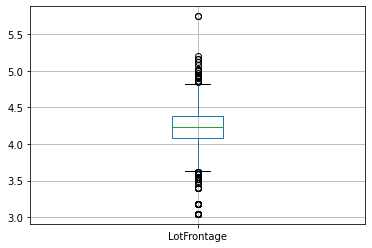

In [314]:
pd.DataFrame(a).boxplot(column = 'LotFrontage')

In [325]:
# categorical variables
categorical = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']
#categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']


In [326]:
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [340]:
# now lets see different levels in these features    
for feature in categorical:
    print(feature)
    print(len(dataset[feature].unique()))    

MSZoning
5
Street
2
Alley
3
LotShape
4
LandContour
4
Utilities
2
LotConfig
5
LandSlope
3
Neighborhood
25
Condition1
9
Condition2
8
BldgType
5
HouseStyle
8
RoofStyle
6
RoofMatl
8
Exterior1st
15
Exterior2nd
16
MasVnrType
5
ExterQual
4
ExterCond
5
Foundation
6
BsmtQual
5
BsmtCond
5
BsmtExposure
5
BsmtFinType1
7
BsmtFinType2
7
Heating
6
HeatingQC
5
CentralAir
2
Electrical
6
KitchenQual
4
Functional
7
FireplaceQu
6
GarageType
7
GarageFinish
4
GarageQual
6
GarageCond
6
PavedDrive
3
PoolQC
4
Fence
5
MiscFeature
5
SaleType
9
SaleCondition
6


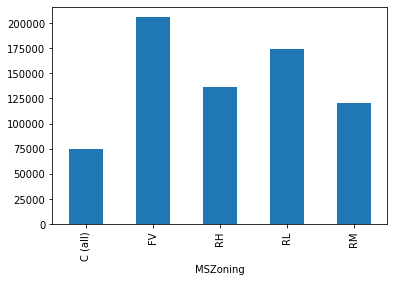

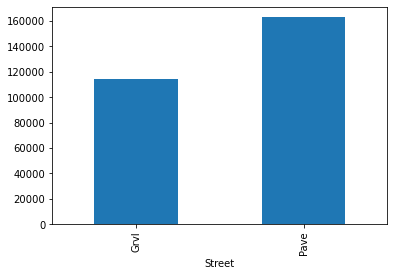

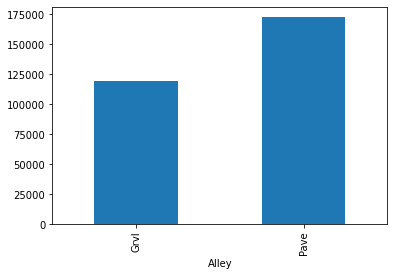

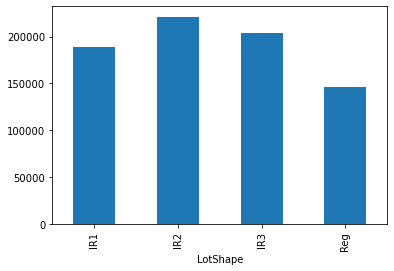

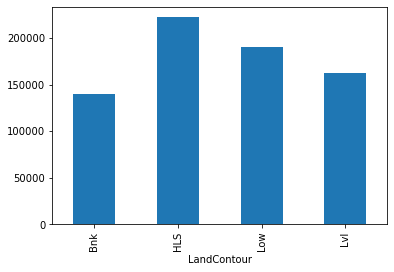

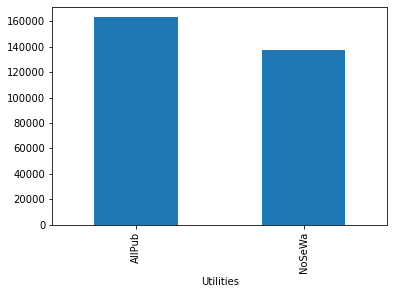

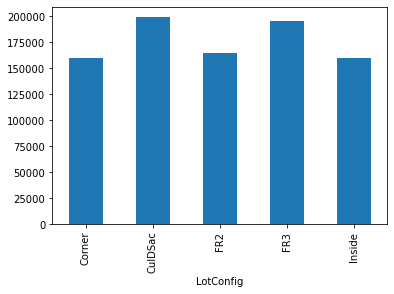

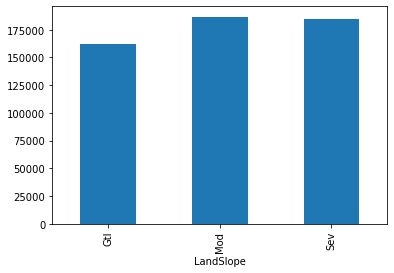

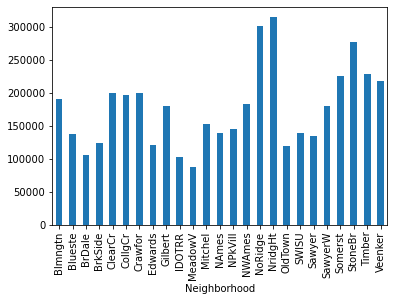

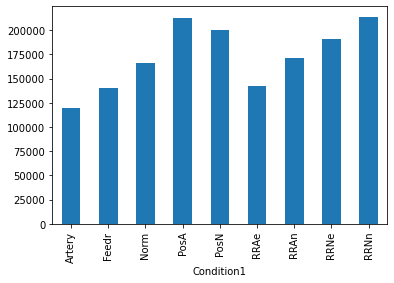

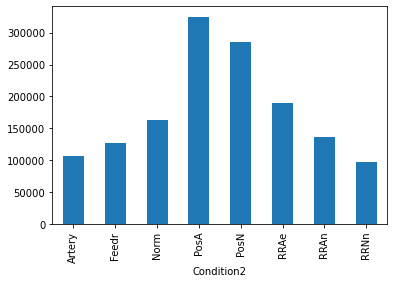

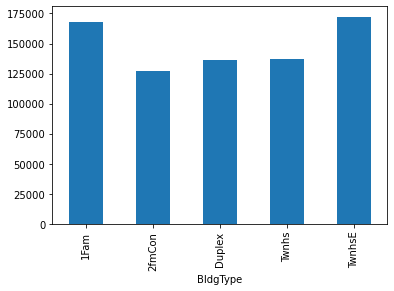

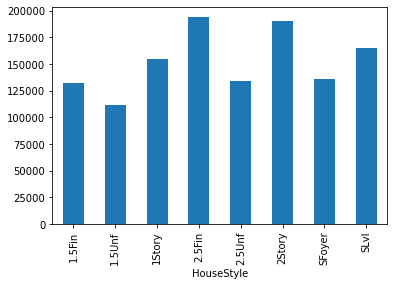

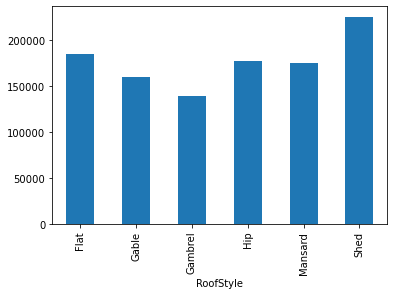

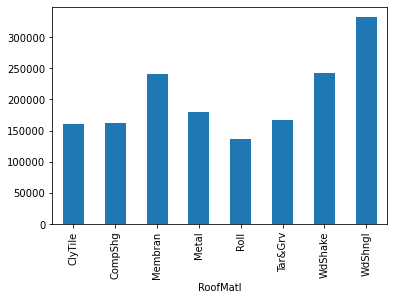

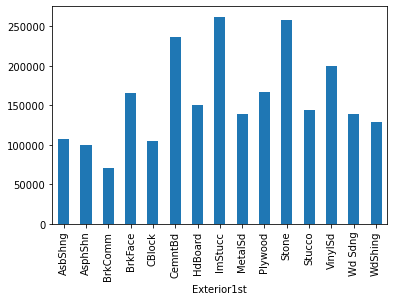

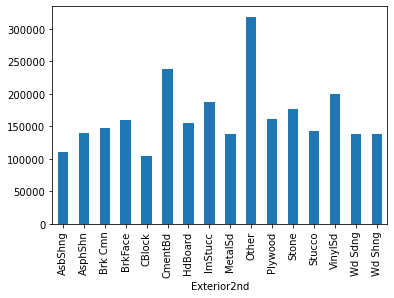

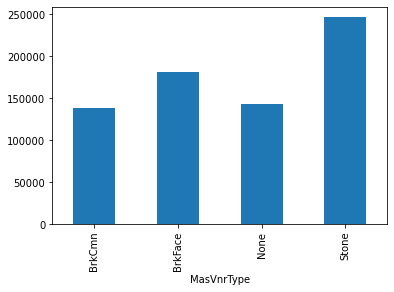

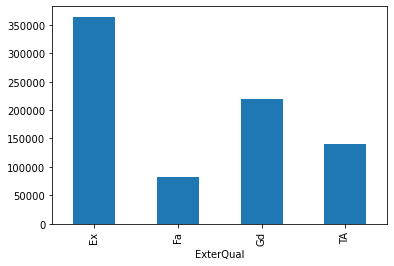

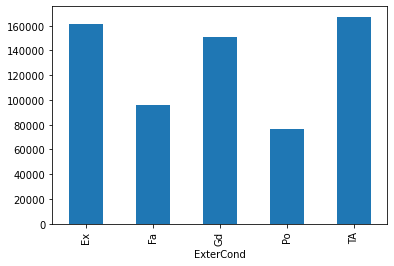

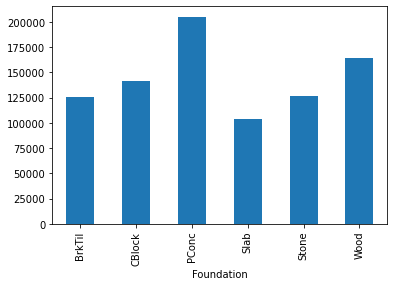

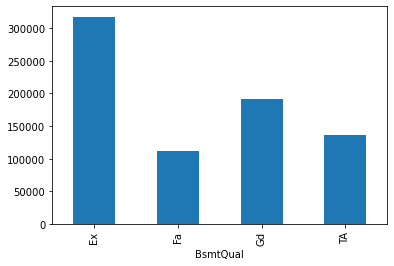

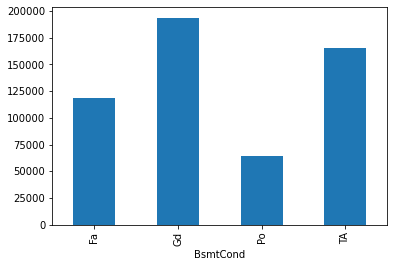

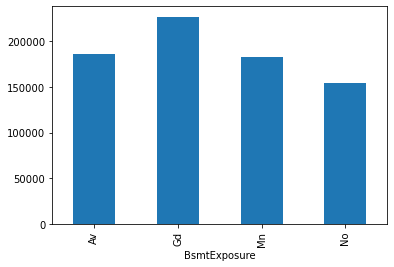

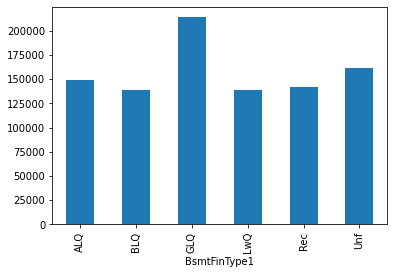

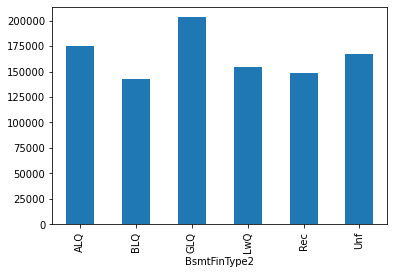

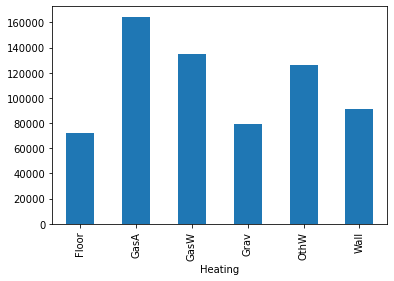

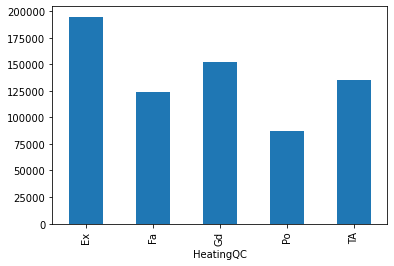

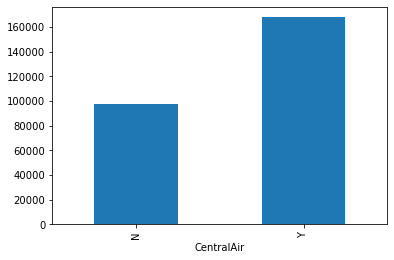

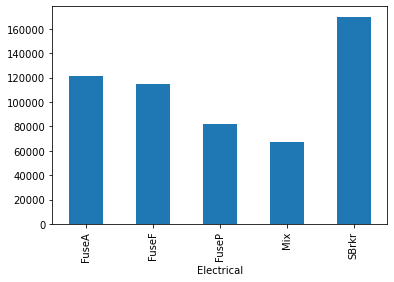

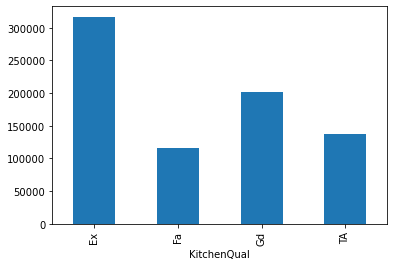

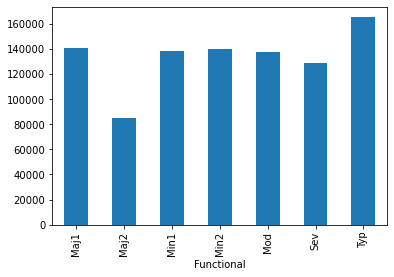

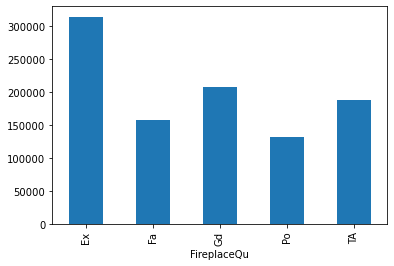

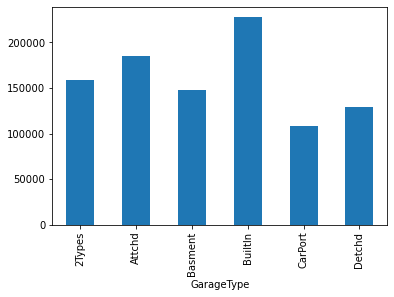

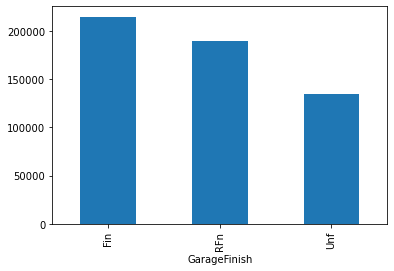

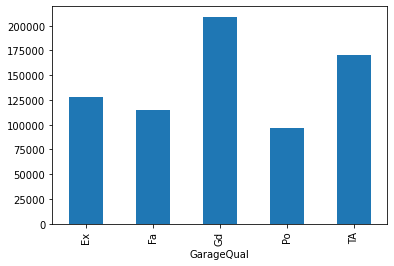

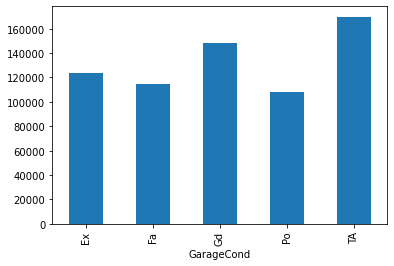

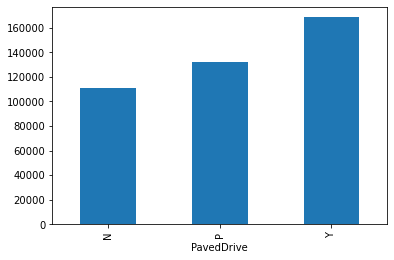

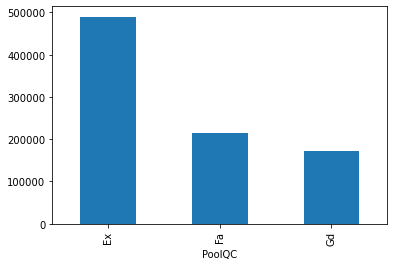

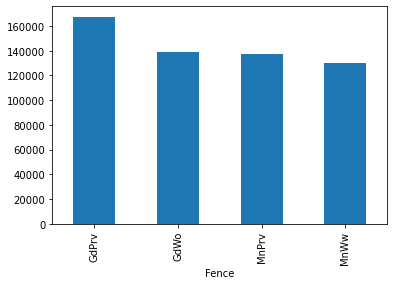

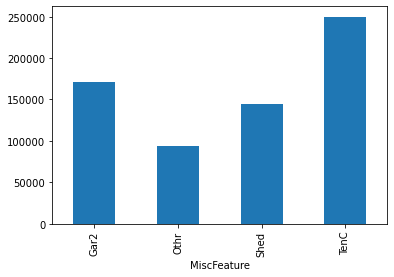

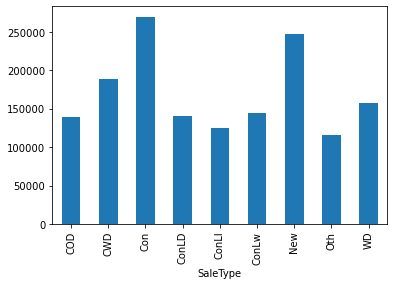

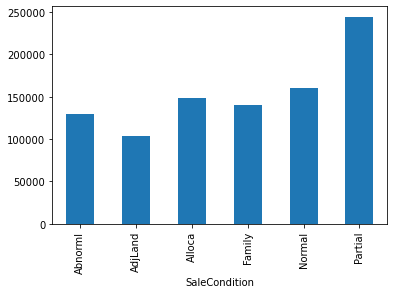

In [349]:
# lets see relationship between these categorical variables and dependent variable
for feature in categorical:
    dataset.groupby(by= feature)['SalePrice'].median().plot.bar()
    plt.show()
    

In [350]:
# from this we can infer because of which categorical features we have value